In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

In [6]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
print(f"Train data shape: {train_data.shape}")
print(f"Train labels shape: {train_labels.shape}")

print(f"Test data shape: {test_data.shape}")
print(f"Test labels shape: {test_labels.shape}")


Train data shape: (25000,)
Train labels shape: (25000,)
Test data shape: (25000,)
Test labels shape: (25000,)


In [11]:
train_data[0]
len(train_data[0])

218

In [12]:
len(train_data[1])

189

In [26]:
train_labels[0]

np.int64(1)

In [28]:
test_labels[1]

np.int64(1)

In [23]:
max([max(review) for review in train_data])

9999

In [33]:
word_index = imdb.get_word_index()
# Key: word; Value: integer
reversed_word_index = dict(
    (value, key) for (key, value) in word_index.items()
)
# Key: integer, Value: word
decoded_review = " ".join(reversed_word_index.get(i-3, "?") for i in train_data[24])
print(decoded_review)

? the original demille movie was made in 1938 with ? march a very good film indeed hollywood's love of remakes brings us a fairly interesting movie starring ? ? he of course was brilliant as he almost always seemed to be in all of his movies charlton heston as andrew jackson was a stroke of genius however the movie did tend to get a little long in places it does not move at the pace of the 1938 version still it is a fun movie that should be seen at least once


In [36]:
def vectorize_sequences(sequences, dimension = 10000):
  # (25000, 10000)
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [37]:
x_train.shape

(25000, 10000)

In [38]:
x_test.shape

(25000, 10000)

In [39]:
x_train[0].shape

(10000,)

In [41]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [40]:
x_train[1].shape

(10000,)

In [43]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [44]:
# model definiton
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

# model compile
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [45]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [46]:
# model fit
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.6677 - loss: 0.6430 - val_accuracy: 0.8527 - val_loss: 0.4647
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8851 - loss: 0.4054 - val_accuracy: 0.8787 - val_loss: 0.3516
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9154 - loss: 0.2896 - val_accuracy: 0.8696 - val_loss: 0.3255
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9240 - loss: 0.2351 - val_accuracy: 0.8834 - val_loss: 0.2916
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9447 - loss: 0.1848 - val_accuracy: 0.8883 - val_loss: 0.2749
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9513 - loss: 0.1567 - val_accuracy: 0.8857 - val_loss: 0.2870
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9590 - loss: 0.1350 - val_accuracy: 0.8852 - val_loss: 0.2865
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9660 - loss: 0.1182 - val_accuracy: 0.8874 - 

In [47]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

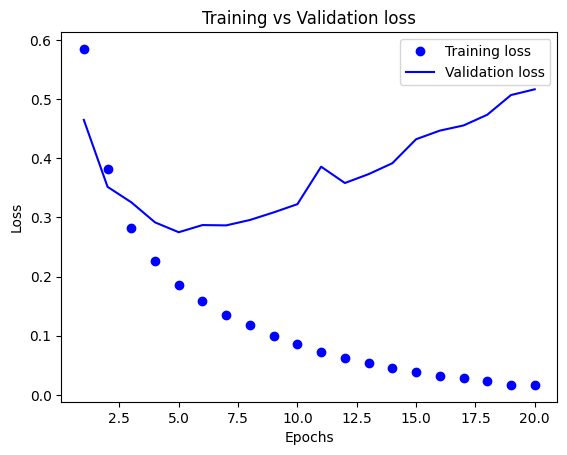

In [50]:
import matplotlib.pyplot as plt
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss)+ 1)
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

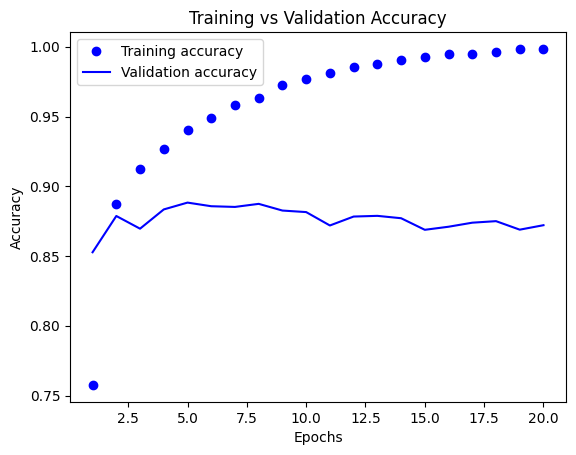

In [52]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

In [53]:
# To prevent overfitting, stop training after 4 epochs

In [ ]:
# model definiton
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

# model compile
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [54]:
model.fit(x_train,
          y_train,
          epochs = 4,
          batch_size = 512)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9498 - loss: 0.2080
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9628 - loss: 0.1205
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9733 - loss: 0.0932
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9788 - loss: 0.0735


In [61]:
results = model.evaluate(x_test, y_test)
print(f"Loss: {results[0]:.4f}")
print(f"Accuracy: {results[1]:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8655 - loss: 0.4270
Loss: 0.4208
Accuracy: 0.87


In [63]:
predictions = model.predict(x_test)
predictions

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.03005043],
       [0.9999989 ],
       [0.47518855],
       ...,
       [0.05997453],
       [0.06492481],
       [0.89481205]], dtype=float32)